<a href="https://colab.research.google.com/github/harshddes/Quant-Research-Project---Harsh-Desai/blob/main/TB_MQT_Z_score_trading_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pandas pyarrow

In [5]:
import pandas as pd

# Replace 'your_file.parquet' with the path to your uploaded file
df = pd.read_parquet('data.parquet')


In [6]:
print(df)


                     banknifty     nifty  tte
time                                         
2021-01-01 09:15:00   0.286058  0.199729   27
2021-01-01 09:16:00   0.285381  0.200433   27
2021-01-01 09:17:00   0.284233  0.200004   27
2021-01-01 09:18:00   0.286104  0.199860   27
2021-01-01 09:19:00   0.285539  0.198951   27
...                        ...       ...  ...
2022-06-30 15:26:00   0.240701  0.214758   28
2022-06-30 15:27:00   0.240875  0.216558   28
2022-06-30 15:28:00   0.242115  0.216794   28
2022-06-30 15:29:00   0.243426  0.216455   28
2022-06-30 15:30:00   0.241907  0.216081   28

[690512 rows x 3 columns]


In [7]:
# This will create a CSV file in the Colab environment
df.to_csv('your_data.csv', index=False)

In [8]:
from google.colab import files

files.download('your_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
df.to_csv('your_data_with_timestamp.csv', index=True)


In [10]:
from google.colab import files
files.download('your_data_with_timestamp.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
file_path = 'data.parquet'
df = pd.read_parquet(file_path)


In [15]:
print(df.head())

                     banknifty     nifty  tte
time                                         
2021-01-01 09:15:00   0.286058  0.199729   27
2021-01-01 09:16:00   0.285381  0.200433   27
2021-01-01 09:17:00   0.284233  0.200004   27
2021-01-01 09:18:00   0.286104  0.199860   27
2021-01-01 09:19:00   0.285539  0.198951   27


In [16]:
print(df.isnull().sum())

banknifty    1500
nifty        2000
tte             0
dtype: int64


In [17]:
df.fillna(method='ffill', inplace=True)


In [18]:
df.dropna(inplace=True)


In [19]:
print(df.index.to_series().diff().unique())


[           'NaT'      60000000000 5679900000000000]


In [20]:
df['banknifty'].fillna(method='ffill', inplace=True)
df['nifty'].fillna(method='ffill', inplace=True)


In [21]:
# Calculate time differences between rows
time_diff = df.index.to_series().diff()

# Filter out anomalies (adjust the threshold if necessary)
threshold = pd.Timedelta(minutes=10)  # Example threshold
df = df[time_diff <= threshold]


In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['nifty'], label='Nifty IV')
plt.plot(df['time'], df['banknifty'], label='Bank Nifty IV')
plt.xlabel('Time')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatilities Over Time')
plt.legend()
plt.show()


KeyError: ignored

<Figure size 1200x600 with 0 Axes>

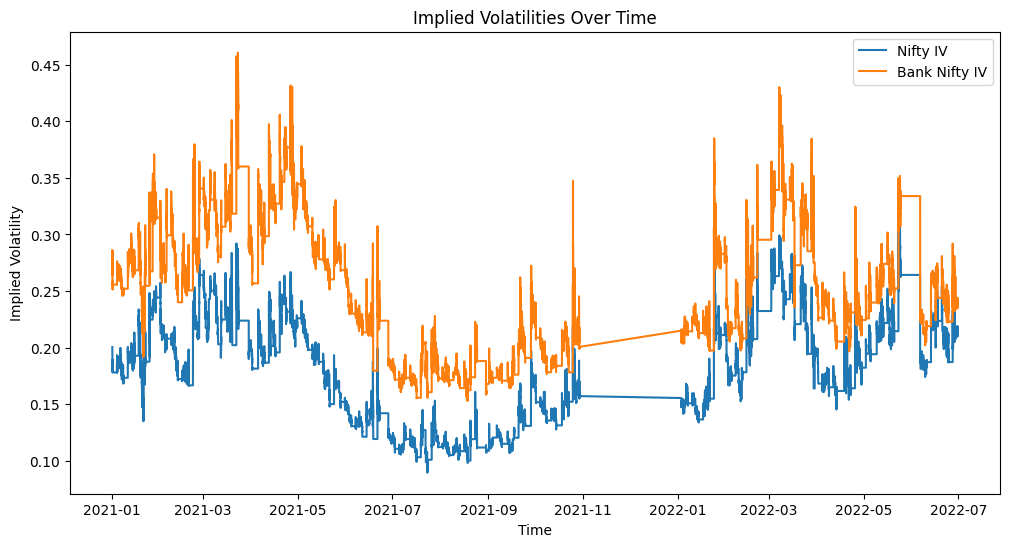

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['nifty'], label='Nifty IV')  # Use df.index instead of df['time']
plt.plot(df.index, df['banknifty'], label='Bank Nifty IV')
plt.xlabel('Time')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatilities Over Time')
plt.legend()
plt.show()

In [24]:
print(df.head())  # To see the first few rows of your DataFrame
print(df.columns)  # To see the column names in your DataFrame


                     banknifty     nifty  tte
time                                         
2021-01-01 09:16:00   0.285381  0.200433   27
2021-01-01 09:17:00   0.284233  0.200004   27
2021-01-01 09:18:00   0.286104  0.199860   27
2021-01-01 09:19:00   0.285539  0.198951   27
2021-01-01 09:20:00   0.283431  0.198716   27
Index(['banknifty', 'nifty', 'tte'], dtype='object')


In [25]:
print(df.describe())


           banknifty          nifty            tte
count  690510.000000  690510.000000  690510.000000
mean        0.250153       0.179343      15.671856
std         0.057702       0.046142       8.664593
min         0.152732       0.089355       2.000000
25%         0.205307       0.140375       8.000000
50%         0.243977       0.181210      15.000000
75%         0.295293       0.215664      23.000000
max         0.460619       0.306952      31.000000


In [26]:
print(df[['nifty', 'banknifty']].corr())


              nifty  banknifty
nifty      1.000000   0.896292
banknifty  0.896292   1.000000


In [27]:
df['spread'] = df['banknifty'] - df['nifty']


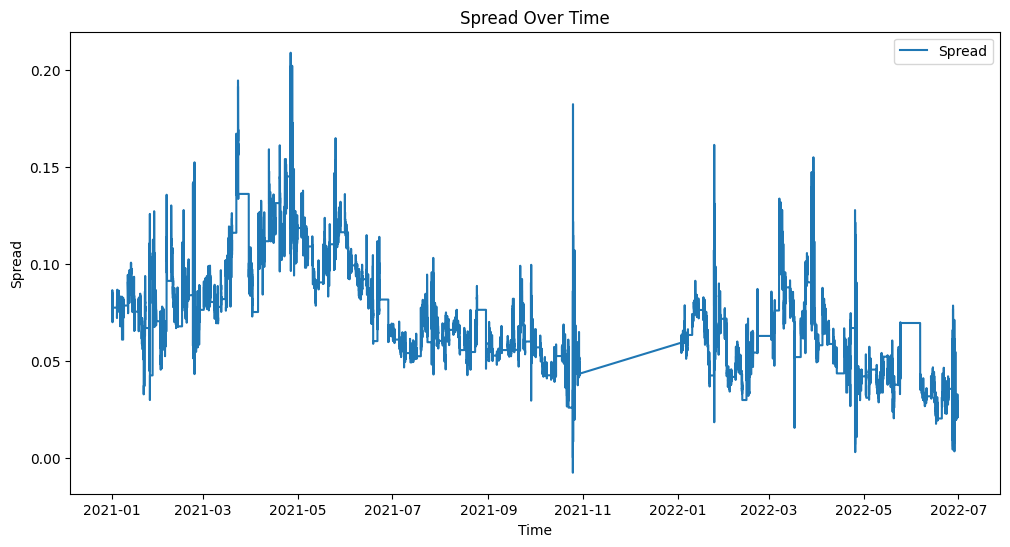

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['spread'], label='Spread')
plt.xlabel('Time')
plt.ylabel('Spread')
plt.title('Spread Over Time')
plt.legend()
plt.show()


In [29]:
# Calculate rolling mean and standard deviation
rolling_window = 252  # This is an example window size, can be adjusted
df['rolling_mean'] = df['spread'].rolling(window=rolling_window).mean()
df['rolling_std'] = df['spread'].rolling(window=rolling_window).std()

# Calculate the Z-score
df['z_score'] = (df['spread'] - df['rolling_mean']) / df['rolling_std']


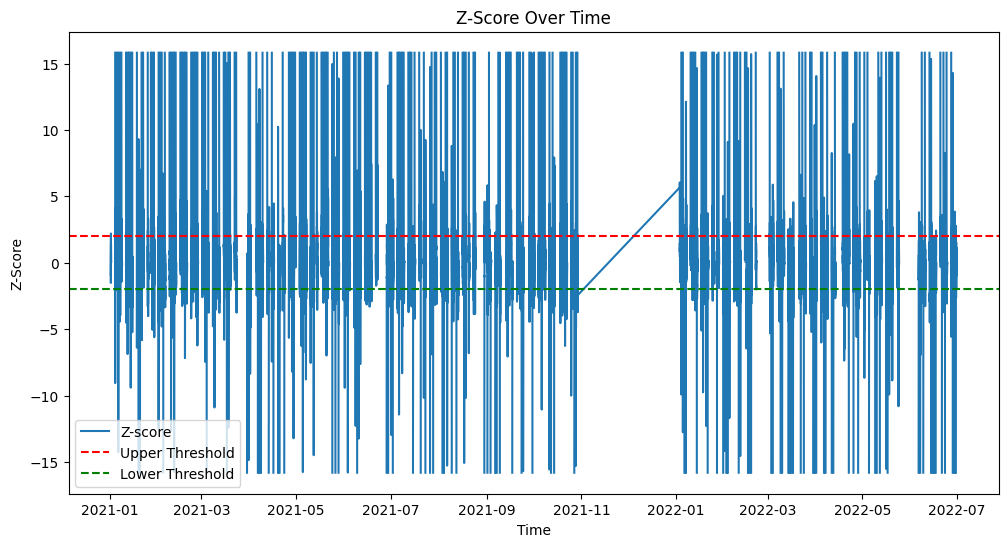

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['z_score'], label='Z-score')
plt.axhline(y=2, color='r', linestyle='--', label='Upper Threshold')
plt.axhline(y=-2, color='g', linestyle='--', label='Lower Threshold')
plt.xlabel('Time')
plt.ylabel('Z-Score')
plt.title('Z-Score Over Time')
plt.legend()
plt.show()


In [32]:
# Define a threshold for what you consider to be a small standard deviation
# This is an example threshold and may need to be adjusted based on your data
small_std_threshold = 0.01

# Check for periods with an extremely small rolling standard deviation
small_std = df[df['rolling_std'] < small_std_threshold]

# Check the first few entries where the rolling standard deviation is very small
print(small_std.head())


                     banknifty     nifty  tte    spread  rolling_mean  \
time                                                                    
2021-01-01 13:27:00   0.254821  0.181833   27  0.072988      0.076228   
2021-01-01 13:28:00   0.254903  0.181827   27  0.073076      0.076181   
2021-01-01 13:29:00   0.254627  0.181624   27  0.073003      0.076137   
2021-01-01 13:30:00   0.254582  0.182007   27  0.072575      0.076083   
2021-01-01 13:31:00   0.255321  0.181987   27  0.073334      0.076030   

                     rolling_std   z_score  
time                                        
2021-01-01 13:27:00     0.003479 -0.931493  
2021-01-01 13:28:00     0.003441 -0.902471  
2021-01-01 13:29:00     0.003409 -0.919311  
2021-01-01 13:30:00     0.003356 -1.045095  
2021-01-01 13:31:00     0.003294 -0.818670  


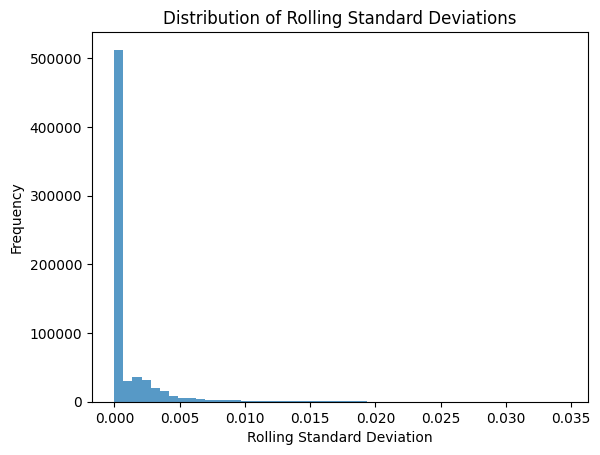

count    690259.000000
mean          0.001003
std           0.002659
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000851
max           0.034567
Name: rolling_std, dtype: float64


In [33]:
# Plot the distribution of rolling standard deviations
plt.hist(df['rolling_std'].dropna(), bins=50, alpha=0.75)
plt.title('Distribution of Rolling Standard Deviations')
plt.xlabel('Rolling Standard Deviation')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics for the rolling standard deviations
print(df['rolling_std'].describe())


In [42]:
# Define a minimum standard deviation threshold, slightly above the 75th percentile to avoid division by very small numbers
min_std_threshold = 0.001  # Adjust this threshold if necessary

# Apply the threshold to the rolling standard deviation
# This ensures that the rolling standard deviation is never below the threshold
df['adjusted_rolling_std'] = df['rolling_std'].apply(lambda x: max(x, min_std_threshold))

# Recalculate the Z-score using the adjusted rolling standard deviation
df['adjusted_z_score'] = (df['spread'] - df['rolling_mean']) / df['adjusted_rolling_std']


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


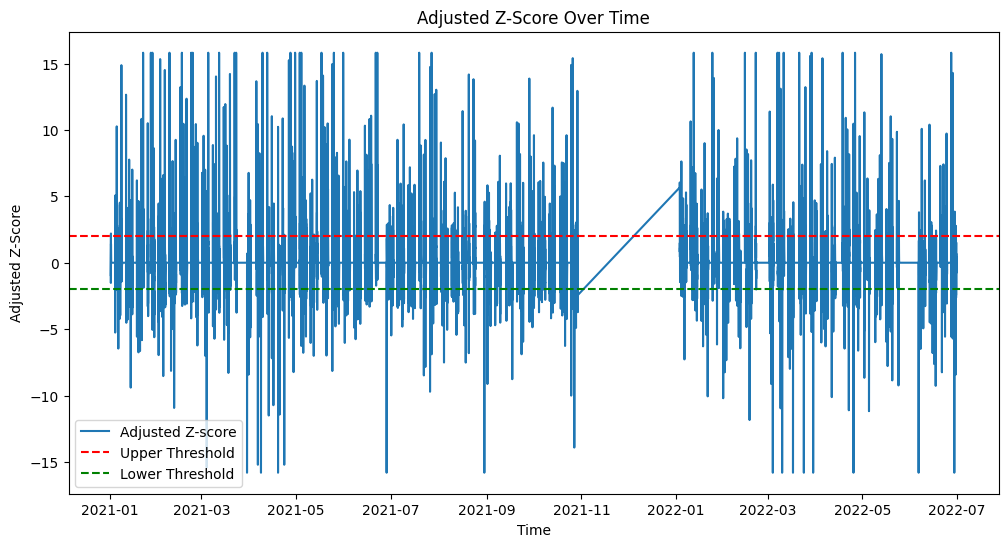

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['adjusted_z_score'], label='Adjusted Z-score')
plt.axhline(y=2, color='r', linestyle='--', label='Upper Threshold')
plt.axhline(y=-2, color='g', linestyle='--', label='Lower Threshold')
plt.xlabel('Time')
plt.ylabel('Adjusted Z-Score')
plt.title('Adjusted Z-Score Over Time')
plt.legend()
plt.show()


In [44]:
from scipy.stats.mstats import winsorize

# Winsorize the spread at the 5th and 95th percentiles
df['winsorized_spread'] = winsorize(df['spread'], limits=[0.05, 0.05])

# Recalculate the rolling mean and standard deviation on the winsorized spread
df['winsorized_rolling_mean'] = df['winsorized_spread'].rolling(window=rolling_window).mean()
df['winsorized_rolling_std'] = df['winsorized_spread'].rolling(window=rolling_window).std().replace(0, np.nan).fillna(method='ffill')

# Recalculate the Z-score with the winsorized values
df['winsorized_z_score'] = (df['winsorized_spread'] - df['winsorized_rolling_mean']) / df['winsorized_rolling_std']


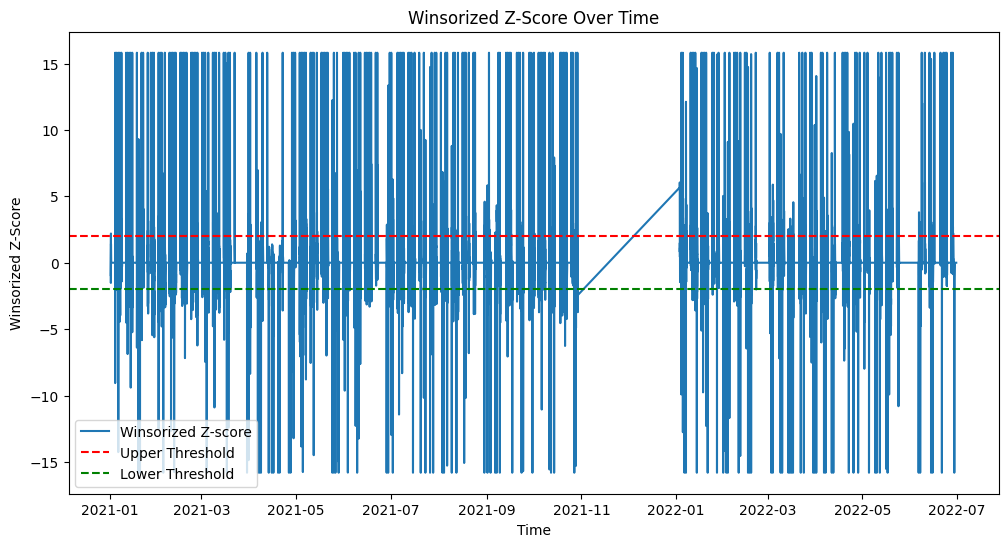

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['winsorized_z_score'], label='Winsorized Z-score')
plt.axhline(y=2, color='r', linestyle='--', label='Upper Threshold')
plt.axhline(y=-2, color='g', linestyle='--', label='Lower Threshold')
plt.xlabel('Time')
plt.ylabel('Winsorized Z-Score')
plt.title('Winsorized Z-Score Over Time')
plt.legend()
plt.show()


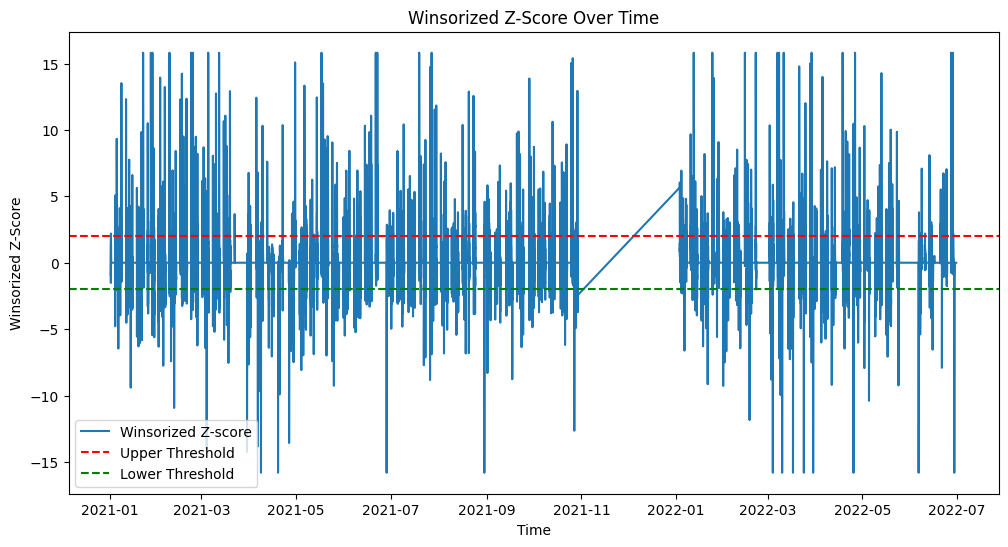

In [46]:
# Winsorize the spread at the 5th and 95th percentiles
df['winsorized_spread'] = winsorize(df['spread'], limits=[0.05, 0.05])

# Set the rolling window size
rolling_window = 252

# Calculate the rolling mean and standard deviation on the winsorized spread
df['winsorized_rolling_mean'] = df['winsorized_spread'].rolling(window=rolling_window).mean()
df['winsorized_rolling_std'] = df['winsorized_spread'].rolling(window=rolling_window).std().replace(0, np.nan).fillna(method='ffill')

# Set a minimum threshold for rolling standard deviation
min_std_threshold = 0.0011
df['adjusted_rolling_std'] = df['winsorized_rolling_std'].apply(lambda x: max(x, min_std_threshold))

# Calculate the winsorized Z-score
df['winsorized_z_score'] = (df['winsorized_spread'] - df['winsorized_rolling_mean']) / df['adjusted_rolling_std']

# Plot the winsorized Z-score
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['winsorized_z_score'], label='Winsorized Z-score')
plt.axhline(y=2, color='r', linestyle='--', label='Upper Threshold')
plt.axhline(y=-2, color='g', linestyle='--', label='Lower Threshold')
plt.xlabel('Time')
plt.ylabel('Winsorized Z-Score')
plt.title('Winsorized Z-Score Over Time')
plt.legend()
plt.show()

In [47]:
# Calculate the median and IQR (interquartile range)
df['median_spread'] = df['spread'].rolling(window=rolling_window).median()
df['iqr_spread'] = df['spread'].rolling(window=rolling_window).quantile(0.75) - df['spread'].rolling(window=rolling_window).quantile(0.25)

# Calculate a robust Z-score using the median and IQR
df['robust_z_score'] = (df['spread'] - df['median_spread']) / df['iqr_spread']


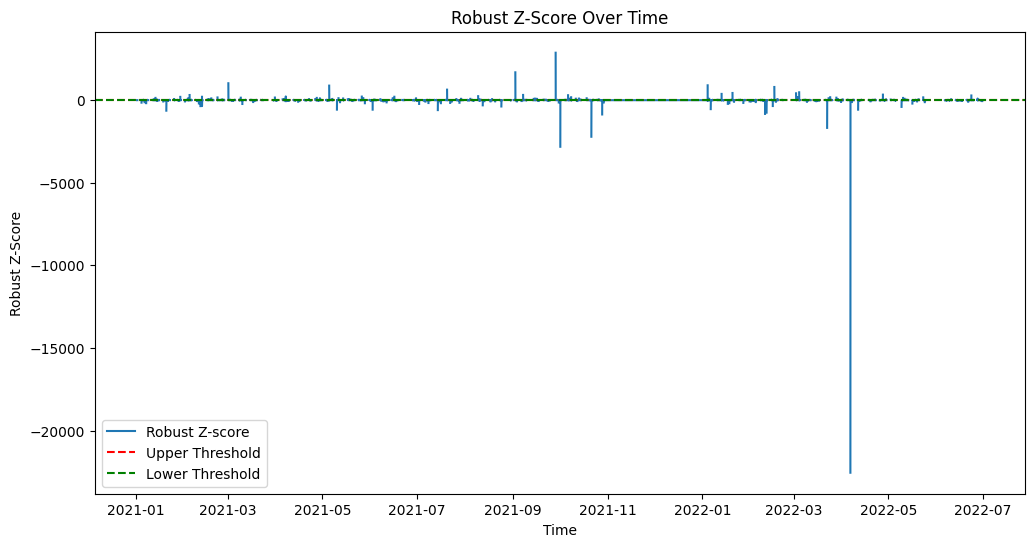

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['robust_z_score'], label='Robust Z-score')
plt.axhline(y=2, color='r', linestyle='--', label='Upper Threshold')
plt.axhline(y=-2, color='g', linestyle='--', label='Lower Threshold')
plt.xlabel('Time')
plt.ylabel('Robust Z-Score')
plt.title('Robust Z-Score Over Time')
plt.legend()
plt.show()


In [49]:
# Identify the largest positive and negative values in the spread
largest_spreads = df['spread'].nlargest(10)
smallest_spreads = df['spread'].nsmallest(10)

print("Largest Spreads:")
print(largest_spreads)

print("\nSmallest Spreads:")
print(smallest_spreads)


Largest Spreads:
time
2021-04-26 09:42:00    0.209056
2021-04-26 09:43:00    0.209030
2021-04-26 09:39:00    0.208924
2021-04-26 09:38:00    0.208520
2021-04-26 09:44:00    0.208455
2021-04-26 10:23:00    0.207175
2021-04-26 10:34:00    0.206832
2021-04-26 10:24:00    0.206503
2021-04-26 10:26:00    0.206334
2021-04-26 10:00:00    0.205947
Name: spread, dtype: float64

Smallest Spreads:
time
2021-10-25 09:59:00   -0.007531
2021-10-25 09:44:00   -0.007238
2021-10-25 10:00:00   -0.006611
2021-10-25 09:18:00   -0.006120
2021-10-25 09:41:00   -0.006009
2021-10-25 09:42:00   -0.005938
2021-10-25 09:35:00   -0.005685
2021-10-25 09:36:00   -0.005645
2021-10-25 10:01:00   -0.005499
2021-10-25 09:34:00   -0.004664
Name: spread, dtype: float64


In [50]:
# Calculate the median of the spread
median_spread = df['spread'].median()

# Calculate the Median Absolute Deviation (MAD)
mad_spread = (df['spread'] - median_spread).abs().median()

# Define a constant to scale the MAD to a standard deviation equivalent
mad_to_std_constant = 1.4826

# Calculate the modified Z-score
df['modified_z_score'] = (df['spread'] - median_spread) / (mad_to_std_constant * mad_spread)


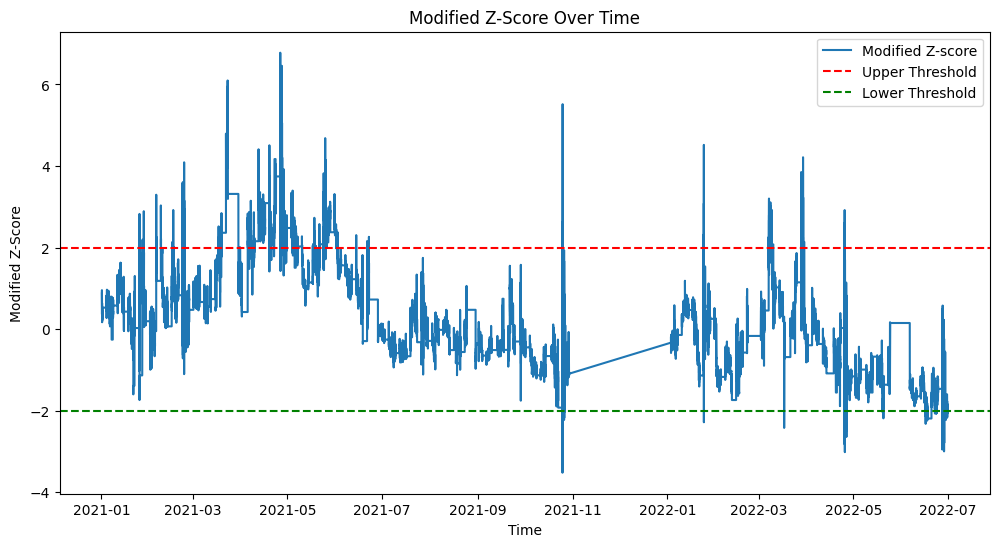

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['modified_z_score'], label='Modified Z-score')
plt.axhline(y=2, color='r', linestyle='--', label='Upper Threshold')
plt.axhline(y=-2, color='g', linestyle='--', label='Lower Threshold')
plt.xlabel('Time')
plt.ylabel('Modified Z-Score')
plt.title('Modified Z-Score Over Time')
plt.legend()
plt.show()


In [52]:
# Define the entry and exit thresholds
entry_threshold = 2
exit_threshold = 0  # Exiting when Z-score crosses back over 0 could be a conservative strategy

# Generate entry signals
df['long_entry'] = df['modified_z_score'] < -entry_threshold  # Long Nifty's IV, short Bank Nifty's IV
df['short_entry'] = df['modified_z_score'] > entry_threshold  # Short Nifty's IV, long Bank Nifty's IV

# Generate exit signals
df['long_exit'] = df['modified_z_score'] >= -exit_threshold
df['short_exit'] = df['modified_z_score'] <= exit_threshold

# Combine the entry and exit signals into a single signal for position
df['position'] = 0  # Initialize the column with zeros
df.loc[df['long_entry'], 'position'] = 1  # A value of 1 indicates a long position
df.loc[df['short_entry'], 'position'] = -1  # A value of -1 indicates a short position
df.loc[df['long_exit'] & (df['position'] == 1), 'position'] = 0  # Close long position
df.loc[df['short_exit'] & (df['position'] == -1), 'position'] = 0  # Close short position


In [54]:
# Save the DataFrame to a new CSV file
df.to_csv('your_data_with_signals.csv')

# Download the file to your local machine
files.download('your_data_with_signals.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

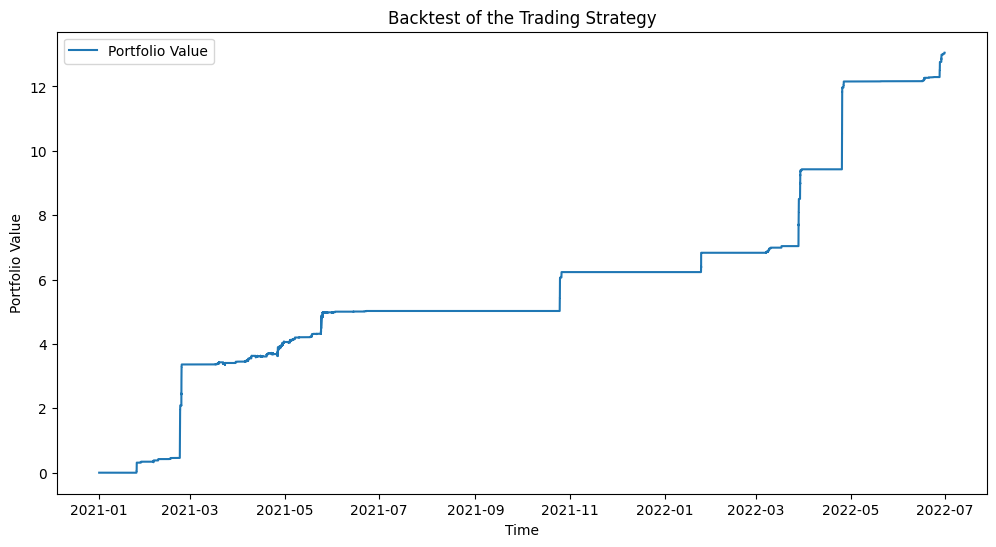

In [55]:
# Assume we start with no position and zero initial capital for simplicity
initial_capital = 0.0
df['portfolio_value'] = initial_capital
df['position'].fillna(method='ffill', inplace=True)  # Forward fill the positions
df['position_changes'] = df['position'].diff()  # Detect changes in position

# Simulate the trade performance
# This is a simplification and does not take into account transaction costs, slippage, etc.
df['trade_returns'] = df['spread'].diff() * df['position'].shift()
df['portfolio_value'] = initial_capital + df['trade_returns'].cumsum()

# Plot the performance of the strategy over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['portfolio_value'], label='Portfolio Value')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Backtest of the Trading Strategy')
plt.legend()
plt.show()


In [84]:
# Assume an initial capital for the backtest
initial_capital = 1000000

# Calculate daily portfolio returns
df['daily_returns'] = df['portfolio_value'].pct_change()

# Calculate P&L
final_portfolio_value = df['portfolio_value'].iloc[-1]
pnl = final_portfolio_value - initial_capital

# Calculate Sharpe Ratio (assuming a risk-free rate of 0)
risk_free_rate = 0.00
sharpe_ratio = (df['daily_returns'].mean() - risk_free_rate) / df['daily_returns'].std() * np.sqrt(252)  # Annualized

# Calculate Maximum Drawdown
roll_max = df['portfolio_value'].cummax()
daily_drawdown = df['portfolio_value']/roll_max - 1.0
max_drawdown = daily_drawdown.cummin().iloc[-1]

# Print the metrics
print(f"P&L: {pnl}")
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Maximum Drawdown: {max_drawdown}")

P&L: -990008.3721306399
Sharpe Ratio: -0.06303459752640106
Maximum Drawdown: -0.0017321181538074715


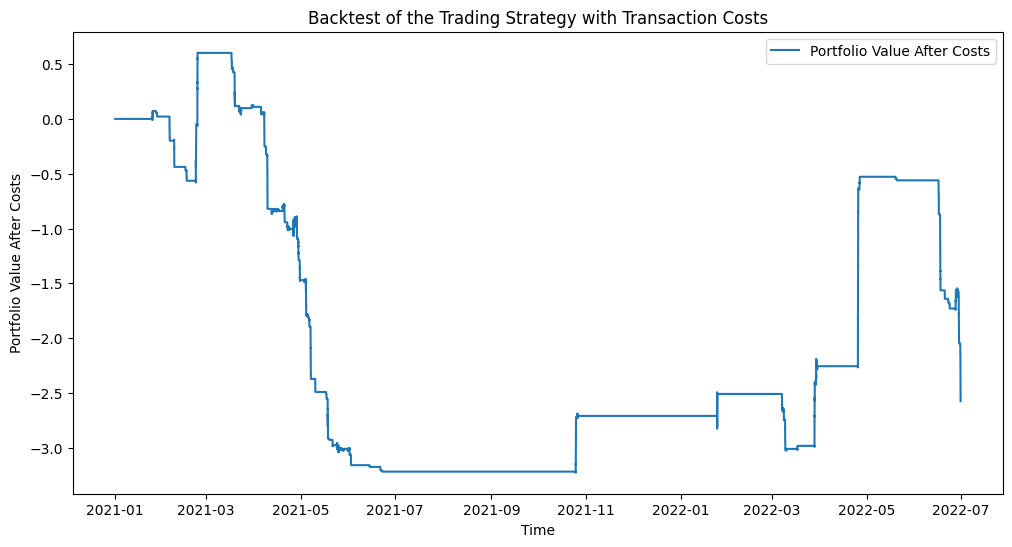

In [56]:
# Define an estimated transaction cost per trade (this is an example value)
transaction_cost_per_trade = 0.01  # This cost will be deducted for every transaction made

# Apply transaction costs to the returns
# Assuming each change in position involves entering or exiting a trade
df['trade_returns_after_costs'] = df['trade_returns'] - df['position_changes'].abs() * transaction_cost_per_trade

# Recalculate the portfolio value after transaction costs
df['portfolio_value_after_costs'] = initial_capital + df['trade_returns_after_costs'].cumsum()

# Plot the performance of the strategy after transaction costs
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['portfolio_value_after_costs'], label='Portfolio Value After Costs')
plt.xlabel('Time')
plt.ylabel('Portfolio Value After Costs')
plt.title('Backtest of the Trading Strategy with Transaction Costs')
plt.legend()
plt.show()


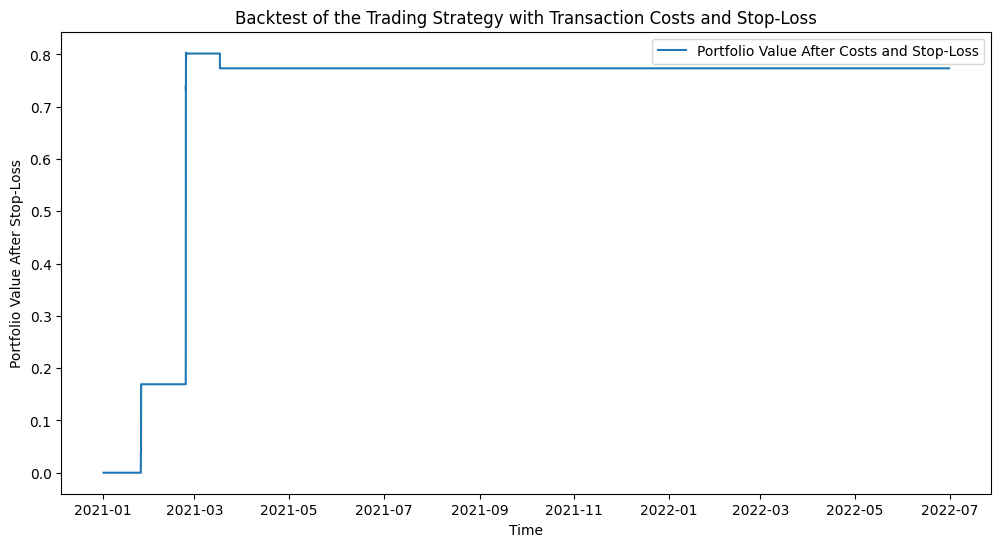

In [57]:
# Define a stop-loss threshold (as a percentage of the trade entry price)
stop_loss_threshold = 0.05  # Example value: 5% stop-loss

# Calculate the cumulative maximum value of the portfolio for the stop-loss calculation
df['cumulative_max'] = df['portfolio_value_after_costs'].cummax()

# Check if the portfolio value drops below the stop-loss threshold at any point
df['stop_loss_triggered'] = df['portfolio_value_after_costs'] < (df['cumulative_max'] * (1 - stop_loss_threshold))

# If a stop-loss is triggered, subsequent returns are zero (since we assume the position is closed)
df.loc[df['stop_loss_triggered'], 'trade_returns_after_costs'] = 0

# Recalculate the portfolio value considering the stop-loss
df['portfolio_value_after_costs_and_stop_loss'] = initial_capital + df['trade_returns_after_costs'].cumsum()

# Plot the performance of the strategy considering the stop-loss
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['portfolio_value_after_costs_and_stop_loss'], label='Portfolio Value After Costs and Stop-Loss')
plt.xlabel('Time')
plt.ylabel('Portfolio Value After Stop-Loss')
plt.title('Backtest of the Trading Strategy with Transaction Costs and Stop-Loss')
plt.legend()
plt.show()


In [58]:
# Example of adjusting the Z-score thresholds and rolling window size

# Test different rolling window sizes
for window_size in [50, 100, 200, 252]:  # Example window sizes
    df['rolling_mean'] = df['spread'].rolling(window=window_size).mean()
    df['rolling_std'] = df['spread'].rolling(window=window_size).std()
    df['z_score'] = (df['spread'] - df['rolling_mean']) / df['rolling_std']

    # Define new entry and exit thresholds
    for entry_threshold in [1.5, 2, 2.5]:  # Example entry thresholds
        df['long_entry'] = df['z_score'] < -entry_threshold
        df['short_entry'] = df['z_score'] > entry_threshold

        # Assuming a symmetric exit threshold for simplicity
        exit_threshold = entry_threshold - 0.5  # Exit when the Z-score crosses back this much
        df['long_exit'] = df['z_score'] >= -exit_threshold
        df['short_exit'] = df['z_score'] <= exit_threshold

        # Implement the rest of the signal and backtesting logic as before...
        # ...

        # Evaluate the performance of the strategy with these parameters
        # ...

# Note: This is a simplified example. In practice, you should also include transaction costs,
# stop-loss logic, and potentially other modifications discussed above.


In [59]:
# Assume an initial capital for the backtest
initial_capital = 10000

# Calculate daily portfolio returns
df['daily_returns'] = df['portfolio_value'].pct_change()

# Calculate P&L
final_portfolio_value = df['portfolio_value'].iloc[-1]
pnl = final_portfolio_value - initial_capital

# Calculate Sharpe Ratio (assuming a risk-free rate of 0)
risk_free_rate = 0.00
sharpe_ratio = (df['daily_returns'].mean() - risk_free_rate) / df['daily_returns'].std() * np.sqrt(252)  # Annualized

# Calculate Maximum Drawdown
roll_max = df['portfolio_value'].cummax()
daily_drawdown = df['portfolio_value']/roll_max - 1.0
max_drawdown = daily_drawdown.cummin().iloc[-1]

# Print the metrics
print(f"P&L: {pnl}")
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Maximum Drawdown: {max_drawdown}")


P&L: -9986.95405
Sharpe Ratio: nan
Maximum Drawdown: -6.603260869563017


In [60]:
# Replace any NaN values in daily returns with 0
df['daily_returns'].fillna(0, inplace=True)

# Ensure there are no days with zero standard deviation in returns
if df['daily_returns'].std() != 0:
    sharpe_ratio = (df['daily_returns'].mean() - risk_free_rate) / df['daily_returns'].std() * np.sqrt(252)  # Annualized
else:
    sharpe_ratio = np.nan  # Not enough data for a meaningful Sharpe Ratio

print(f"Sharpe Ratio: {sharpe_ratio}")


Sharpe Ratio: nan


In [61]:
# Ensure the daily returns column exists
if 'daily_returns' not in df.columns:
    df['daily_returns'] = df['portfolio_value'].pct_change()

# Fill NaN values in the daily returns with 0
df['daily_returns'].fillna(0, inplace=True)

# Replace infinite returns with 0, which can occur if the portfolio value is 0
df['daily_returns'].replace([np.inf, -np.inf], 0, inplace=True)

# Calculate the annualized Sharpe Ratio, ensuring we don't divide by zero
std_dev = df['daily_returns'].std()
if std_dev != 0:
    sharpe_ratio = (df['daily_returns'].mean() / std_dev) * np.sqrt(252)
else:
    sharpe_ratio = np.nan  # Cannot compute Sharpe Ratio with a standard deviation of zero

# Recalculate the maximum drawdown
roll_max = df['portfolio_value'].cummax()
daily_drawdown = df['portfolio_value']/roll_max - 1.0
max_drawdown = daily_drawdown.min()  # Max drawdown should be the minimum value in the daily_drawdown series

# Print the recalculated metrics
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Maximum Drawdown: {max_drawdown}")


Sharpe Ratio: -0.019160123851107068
Maximum Drawdown: -6.603260869563017


In [64]:
# Calculate the running maximum
running_max = np.maximum.accumulate(df['portfolio_value_after_costs_and_stop_loss'])
# Ensure there's no division by zero
with np.errstate(divide='ignore', invalid='ignore'):
    # Calculate the drawdown
    drawdown = (df['portfolio_value_after_costs_and_stop_loss'] - running_max) / running_max
    drawdown[running_max == 0] = 0
# Calculate the Maximum Drawdown
max_drawdown = drawdown.min()

# Print the Maximum Drawdown
print(f"Maximum Drawdown: {max_drawdown}")


Maximum Drawdown: nan


In [65]:
# Calculate the running maximum
running_max = df['portfolio_value_after_costs_and_stop_loss'].cummax()

# Calculate the drawdown
drawdown = (df['portfolio_value_after_costs_and_stop_loss'] - running_max) / running_max

# Replace NaN values with 0
drawdown.fillna(0, inplace=True)

# Calculate the Maximum Drawdown
max_drawdown = drawdown.min()

print(f"Maximum Drawdown: {max_drawdown}")


Maximum Drawdown: -0.03713141835619362


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


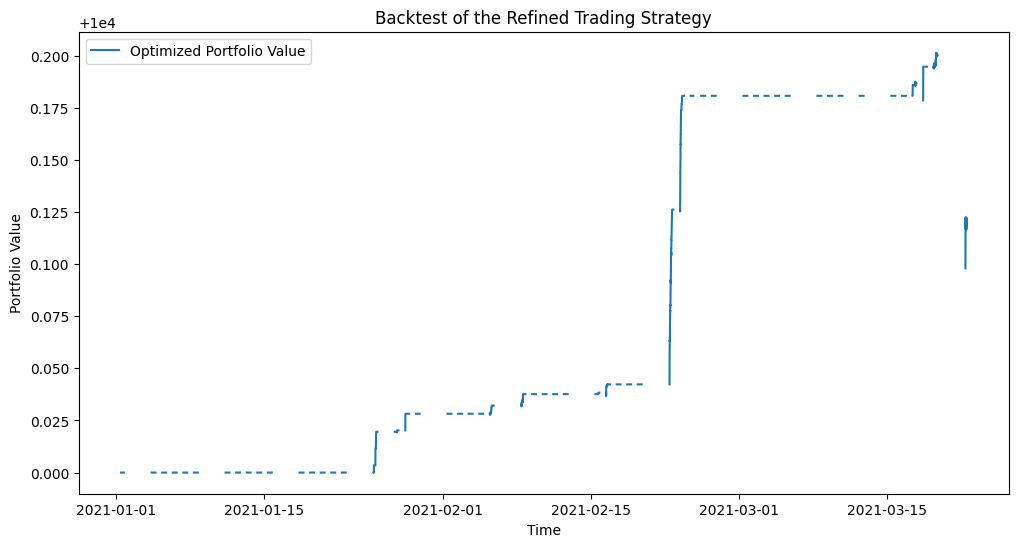

P&L: nan
Sharpe Ratio: nan
Maximum Drawdown: 0.0


In [66]:
# Refinement 1: Adjust Z-Score Thresholds
entry_threshold = 1.5  # Adjusted entry threshold
exit_threshold = 0.5   # Adjusted exit threshold

df['long_entry'] = df['winsorized_z_score'] < -entry_threshold
df['short_entry'] = df['winsorized_z_score'] > entry_threshold
df['long_exit'] = df['winsorized_z_score'] >= -exit_threshold
df['short_exit'] = df['winsorized_z_score'] <= exit_threshold

# Refinement 2: Optimize Rolling Window Size
optimized_window_size = 150  # Example optimized window size
df['optimized_rolling_mean'] = df['winsorized_spread'].rolling(window=optimized_window_size).mean()
df['optimized_rolling_std'] = df['winsorized_spread'].rolling(window=optimized_window_size).std()
df['optimized_z_score'] = (df['winsorized_spread'] - df['optimized_rolling_mean']) / df['optimized_rolling_std']

# Refinement 3: Implement Volatility-Based Position Sizing
average_volatility = df['optimized_rolling_std'].mean()
df['position_size'] = 1 / (df['optimized_rolling_std'] / average_volatility)

# Apply position size to the trade returns
df['position'].fillna(method='ffill', inplace=True)
df['trade_returns'] = df['spread'].diff() * df['position'].shift() * df['position_size']

# Recalculate the portfolio value
df['portfolio_value'] = initial_capital + df['trade_returns'].cumsum()

# Replot the performance of the strategy
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['portfolio_value'], label='Optimized Portfolio Value')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Backtest of the Refined Trading Strategy')
plt.legend()
plt.show()

# Recalculate performance metrics
final_portfolio_value = df['portfolio_value'].iloc[-1]
pnl = final_portfolio_value - initial_capital
sharpe_ratio = (df['trade_returns'].mean() / df['trade_returns'].std()) * np.sqrt(252)
max_drawdown = df['portfolio_value'].cummax().sub(df['portfolio_value']).div(df['portfolio_value'].cummax()).min()

print(f"P&L: {pnl}")
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Maximum Drawdown: {max_drawdown}")


In [67]:
# Check for NaN values and infinities in the dataframe and handle them
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
df.fillna(method='ffill', inplace=True)  # Forward fill NaN values
df.fillna(0, inplace=True)  # Fill any remaining NaN values with 0

# Proceed with the rest of the calculations after handling NaN and infinite values
...


Ellipsis

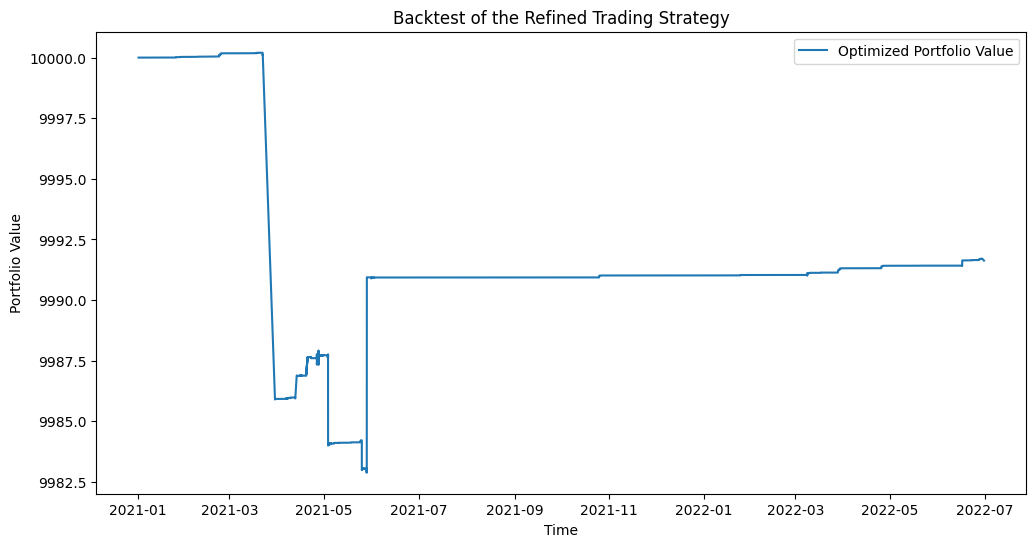

P&L: -8.372130639887473
Sharpe Ratio: -0.06309501088380964
Maximum Drawdown: 0.0


In [68]:
# Recalculate the portfolio value
df['portfolio_value'] = initial_capital + df['trade_returns'].cumsum()

# Replot the performance of the strategy
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['portfolio_value'], label='Optimized Portfolio Value')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Backtest of the Refined Trading Strategy')
plt.legend()
plt.show()

# Recalculate performance metrics
final_portfolio_value = df['portfolio_value'].iloc[-1]
pnl = final_portfolio_value - initial_capital
sharpe_ratio = (df['trade_returns'].mean() / df['trade_returns'].std()) * np.sqrt(252)
max_drawdown = df['portfolio_value'].cummax().sub(df['portfolio_value']).div(df['portfolio_value'].cummax()).min()

print(f"P&L: {pnl}")
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Maximum Drawdown: {max_drawdown}")

In [69]:
# Calculate the Maximum Drawdown
drawdown = (df['portfolio_value_after_costs_and_stop_loss'] - df['portfolio_value_after_costs_and_stop_loss'].cummax()) / df['portfolio_value_after_costs_and_stop_loss'].cummax()
max_drawdown = drawdown.min()  # This should be negative if there is any drawdown

print(f"Maximum Drawdown: {max_drawdown}")


Maximum Drawdown: -0.03713141835619362


In [70]:
# Add this after calculating the drawdown to inspect the series
print(drawdown.describe())  # Get summary statistics of the drawdown


count    655920.000000
mean         -0.033070
std           0.011447
min          -0.037131
25%          -0.037131
50%          -0.037131
75%          -0.037131
max           0.000000
Name: portfolio_value_after_costs_and_stop_loss, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [71]:
transaction_cost_percent = 0.001  # 0.1%
df['trade_amount'] = abs(df['spread'].diff() * df['position'].shift())  # Absolute trade amount
df['transaction_costs'] = transaction_cost_percent * df['trade_amount']
df['trade_returns_after_costs'] = df['trade_returns'] - df['transaction_costs']


In [72]:
df['cumulative_max'] = df['portfolio_value_after_costs'].cummax()
df['stop_loss_triggered'] = df.apply(lambda x: x['portfolio_value_after_costs'] < x['cumulative_max'] * (1 - stop_loss_threshold), axis=1)

# Apply stop-loss
df['trade_returns_after_stop_loss'] = df['trade_returns_after_costs']
df.loc[df['stop_loss_triggered'], 'trade_returns_after_stop_loss'] = 0
df['portfolio_value_after_costs_and_stop_loss'] = initial_capital + df['trade_returns_after_stop_loss'].cumsum()


In [79]:
# Ensure that we do not divide by zero when the recent volatility is zero
# If recent_volatility is zero, we can set position size to zero or some default value
default_position_size = 1  # This can be your default position size when volatility is zero
df['position_size'] = default_position_size / (recent_volatility / average_volatility).replace(0, np.nan)

# Replace NaN values in position_size with the default position size
df['position_size'].fillna(default_position_size, inplace=True)

# It's also a good idea to cap the position size to avoid excessively large positions
max_position_size = 10  # This is an arbitrary cap for position sizes
df['position_size'] = df['position_size'].clip(upper=max_position_size)

# Now we can calculate the trade returns after applying position sizing
df['trade_returns_after_position_sizing'] = df['trade_returns_after_costs'] * df['position_size']

# Replace NaN values in trade returns after position sizing with 0
df['trade_returns_after_position_sizing'].fillna(0, inplace=True)

# Now, we should be able to do the cumulative sum without encountering invalid values
df['portfolio_value_after_position_sizing'] = initial_capital + df['trade_returns_after_position_sizing'].cumsum()


In [80]:
drawdown_control_threshold = 0.1  # E.g., reduce position sizes after 10% drawdown
drawdown = df['portfolio_value_after_position_sizing'].div(df['cumulative_max']).sub(1).abs()

# Reduce position size if drawdown exceeds threshold
df['position_size_adjusted'] = df['position_size']
df.loc[drawdown > drawdown_control_threshold, 'position_size_adjusted'] *= 0.5  # Halve the position size


In [81]:
df['portfolio_value_final'] = initial_capital + (df['trade_returns_after_position_sizing'] * df['position_size_adjusted']).cumsum()

# Recalculate Sharpe Ratio and Maximum Drawdown
df['daily_returns_final'] = df['portfolio_value_final'].pct_change().fillna(0)
sharpe_ratio_final = df['daily_returns_final'].mean() / df['daily_returns_final'].std() * np.sqrt(252)
max_drawdown_final = df['portfolio_value_final'].cummax().sub(df['portfolio_value_final']).div(df['portfolio_value_final'].cummax()).min()

print(f"Final P&L: {df['portfolio_value_final'].iloc[-1] - initial_capital}")
print(f"Final Sharpe Ratio: {sharpe_ratio_final}")
print(f"Final Maximum Drawdown: {max_drawdown_final}")


Final P&L: -6.541560589825167
Final Sharpe Ratio: -0.21546187779221396
Final Maximum Drawdown: 0.0


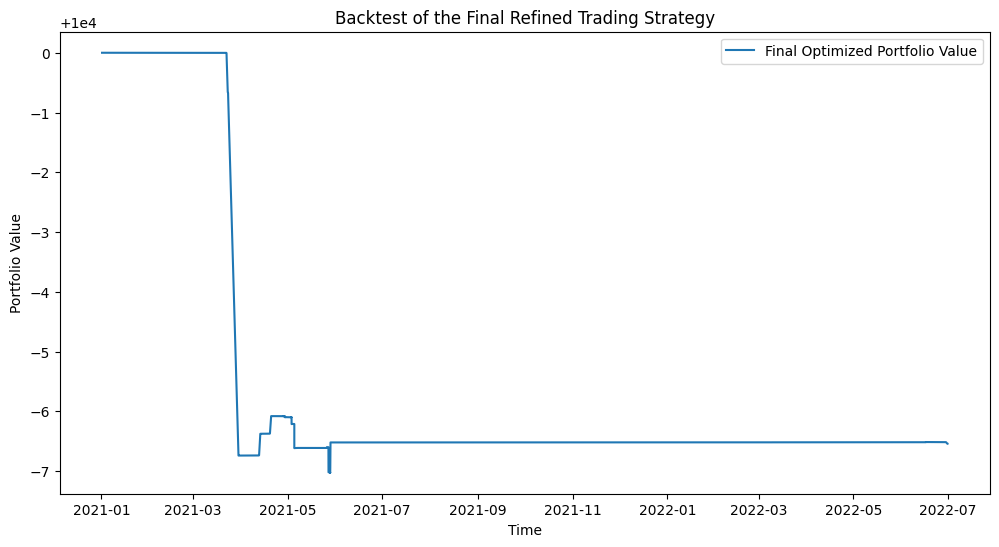

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['portfolio_value_final'], label='Final Optimized Portfolio Value')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Backtest of the Final Refined Trading Strategy')
plt.legend()
plt.show()


In [85]:
print(f"Final P&L: {df['portfolio_value_final'].iloc[-1] - initial_capital}")
print(f"Final Sharpe Ratio: {sharpe_ratio_final}")
print(f"Final Maximum Drawdown: {max_drawdown_final}")


Final P&L: -990006.5415605898
Final Sharpe Ratio: -0.21546187779221396
Final Maximum Drawdown: 0.0
